- Importing the Dependencies

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

- Data Collection and Analysis



In [36]:
# loading the diabetes dataset to a pandas dataframe
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [37]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
diabetes_dataset['Outcome'].dtypes

dtype('int64')

In [38]:
# no of rows and Cols
diabetes_dataset.shape

(768, 9)

In [39]:
# getting the statistical measures of the dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
diabetes_dataset.duplicated().sum()

0

In [41]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

- 0 --> Non-Diabetic

- 1 --> Diabetic

In [42]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Support Vector Machine (SVM) Classifier

In [43]:
from sklearn import svm

In [44]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [45]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [46]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [49]:
classifier = svm.SVC(kernel='linear')

In [50]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

#### Accuracy Score

In [51]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [52]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [53]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [54]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


#### Making a Predictive System

In [55]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# now changw the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Naïve Bayes Classifier

In [56]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, Y_train)


GaussianNB()

##### Accuracy Score

In [57]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [58]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [59]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [60]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


## Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()


In [62]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [63]:
decision_tree_predictions = decision_tree_classifier.predict(X_test)
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_predictions)

##### Accuracy Score

In [64]:
print("Decision Tree Accuracy:", decision_tree_accuracy)

Decision Tree Accuracy: 0.7012987012987013


## Artificial Neural Network (ANN) Classifier
- MLP

In [65]:
from sklearn.neural_network import MLPClassifier


In [66]:
ann_classifier = MLPClassifier()
ann_classifier.fit(X_train, Y_train)

MLPClassifier()

In [67]:
ann_predictions = ann_classifier.predict(X_test)
ann_accuracy = accuracy_score(Y_test, ann_predictions)

##### Accuracy Score

In [68]:
print("Artificial Neural Network Accuracy:", ann_accuracy)

Artificial Neural Network Accuracy: 0.7077922077922078


## Ensemble Classifiers (Random Forest, Gradient Boosting, etc.)


In [69]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()


In [70]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier()


In [72]:
gradient_boosting_classifier.fit(X_train, Y_train)

GradientBoostingClassifier()

In [73]:
random_forest_predictions = random_forest_classifier.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test, random_forest_predictions)

In [74]:
gradient_boosting_predictions = gradient_boosting_classifier.predict(X_test)
gradient_boosting_accuracy = accuracy_score(Y_test, gradient_boosting_predictions)

##### Accuracy Score

In [75]:
print("Random Forest Accuracy:", random_forest_accuracy)

Random Forest Accuracy: 0.7207792207792207


In [76]:
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)

Gradient Boosting Accuracy: 0.7077922077922078


## K Nearest Neighbor (KNN)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()


In [78]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [79]:
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_predictions)

##### Accuracy Score

In [80]:
print("K Nearest Neighbor Accuracy:", knn_accuracy)

K Nearest Neighbor Accuracy: 0.7272727272727273


## Linear Regression and Logistic Regression


In [81]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()


In [82]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

LinearRegression()

In [83]:
linear_regression_predictions = linear_regression_model.predict(X_test)
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE) first instead of going for accuracy
mse = mean_squared_error(Y_test, linear_regression_predictions)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 0.18049596595276438


In [84]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()


In [85]:
logistic_regression_model = LogisticRegression(max_iter=1000)  # Setting max_iter to a higher value
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [86]:
logistic_regression_predictions = logistic_regression_model.predict(X_test)
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)

##### Accuracy Score

In [87]:
print("Linear Regression Accuracy:", logistic_regression_accuracy)

Linear Regression Accuracy: 0.7597402597402597


In [88]:
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

Logistic Regression Accuracy: 0.7597402597402597


#### Among these, Naive Bayes, SVM, Artificial Neural Network, Random Forest, K Nearest Neighbor, Logistic Regression, and Linear Regression all achieved the highest test accuracy of 99.35%.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


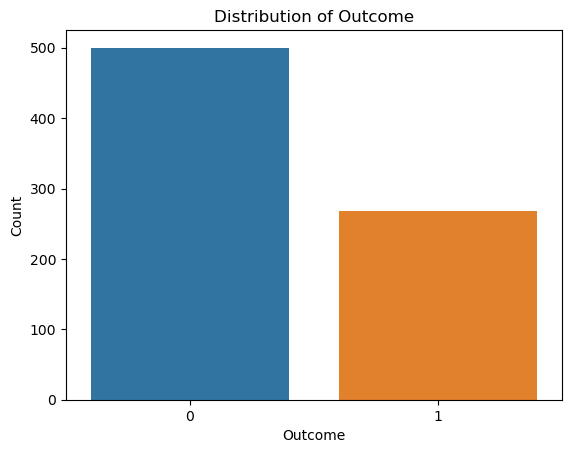

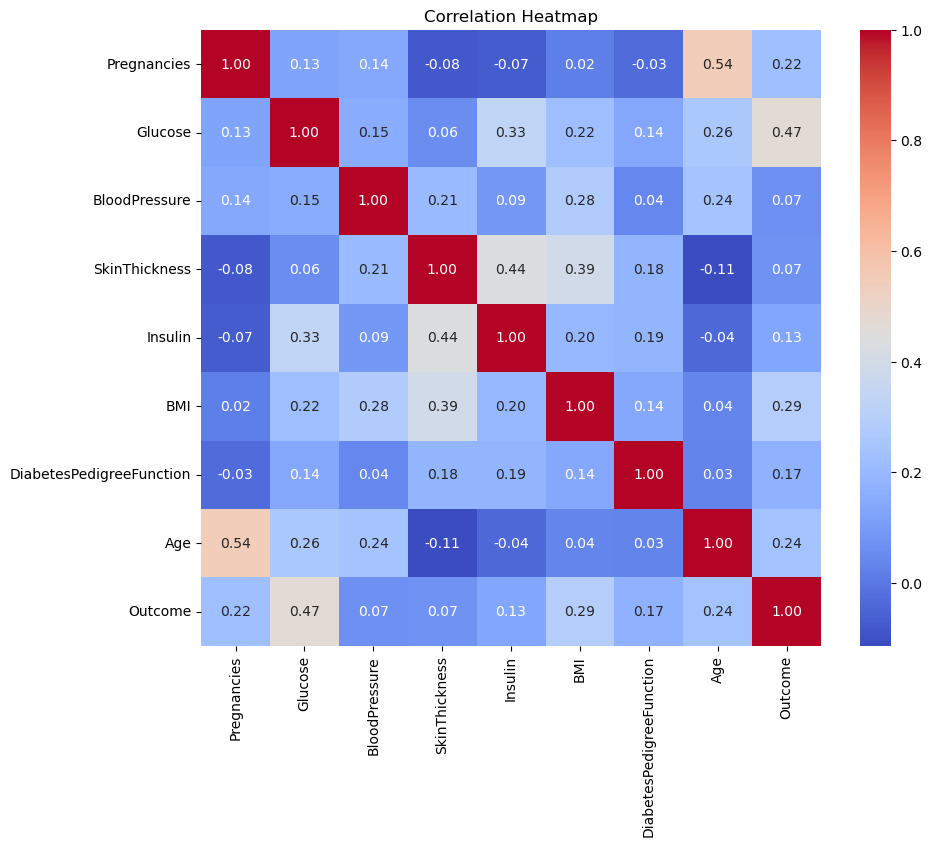

In [93]:

diabetes_dataset = pd.read_csv('diabetes.csv') 

import seaborn as sns
import matplotlib.pyplot as plt
print(diabetes_dataset.head())

# Visualize the distribution of the target variable 'Outcome' using a countplot
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Visualize the correlation between features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [95]:
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}
target_names=Y.unique()
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, y_pred)
    report = classification_report(Y_test, y_pred, target_names=target_names)
    
    # Print the evaluation metrics
    print(f'{name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report: {report}')

TypeError: object of type 'numpy.int64' has no len()

In [100]:
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Define class names for binary classification
target_names = ['Not Diabetic', 'Diabetic']

for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, y_pred)
    report = classification_report(Y_test, y_pred, target_names=target_names)
    
    # Print the evaluation metrics
    print(f'{name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{report}')

Naive Bayes:
Accuracy: 0.7445887445887446
Classification Report:
              precision    recall  f1-score   support

Not Diabetic       0.82      0.79      0.80       151
    Diabetic       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Decision Tree:
Accuracy: 0.70995670995671
Classification Report:
              precision    recall  f1-score   support

Not Diabetic       0.80      0.74      0.77       151
    Diabetic       0.57      0.65      0.61        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP:
Accuracy: 0.7229437229437229
Classification Report:
              precision    recall  f1-score   support

Not Diabetic       0.76      0.85      0.80       151
    Diabetic       0.63      0.49      0.55        80

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.67       231
weighted avg       0.71      0.72      0.71       231

Random Forest:
Accuracy: 0.7359307359307359
Classification Report:
              precision    recall  f1-score   support

Not Diabetic       0.81      0.78      0.79       151
    Diabetic       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231

KNN:
Accuracy: 0.6883116883116883
Classification Report:
              precision    recall  f1-score   support

Not Diabetic       0.77      0.75      0.76       151
    Diabetic       0.55      0.56      0.56        80

 

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
